# Time Series Forecasting for Covid-19 daily new  cases in St. Louis County using  Prophet

In [22]:
# Python
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
from fbprophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
df = pd.read_csv('cases.csv')
print(df)

    State  County  Zip        Date
0    1267     387   13  08/13/2020
1    1245     289   10  08/14/2020
2    1127     256    7  08/15/2020
3    1342     187    5  08/16/2020
4    1148     150    9  08/17/2020
..    ...     ...  ...         ...
88   3876     605  202    12/07/20
89   2658     617  200    12/08/20
90   3250     591  195    12/09/20
91   2640     447  191    12/10/20
92   3858     409  182    12/11/20

[93 rows x 4 columns]


In [24]:
df_Co = df[["Date","County"]]
df_Co = df_Co.rename(columns={'County': 'y', 'Date': 'ds'})
df_Co.head()

,ds,y
0,08/13/2020,387
1,08/14/2020,289
2,08/15/2020,256
3,08/16/2020,187
4,08/17/2020,150


In [25]:
train_data = df_Co.iloc[:len(df_Co)-10]
test_data = df_Co.iloc[len(df_Co)-10:]
print(test_data)

          ds    y
83  12/01/20  602
84  12/03/20  572
85  12/04/20  695
86  12/05/20  688
87  12/06/20  902
88  12/07/20  605
89  12/08/20  617
90  12/09/20  591
91  12/10/20  447
92  12/11/20  409


In [26]:
m = Prophet()
m.fit(train_data)
future = m.make_future_dataframe(periods=10)
prophet_pred = m.predict(future)
prophet_pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
88,2020-12-06,738.942483,556.681142,914.327451
89,2020-12-07,731.135316,550.793469,907.146412
90,2020-12-08,861.818853,681.551882,1030.387836
91,2020-12-09,823.022642,654.320776,994.096361
92,2020-12-10,841.528760,658.797411,1022.147308


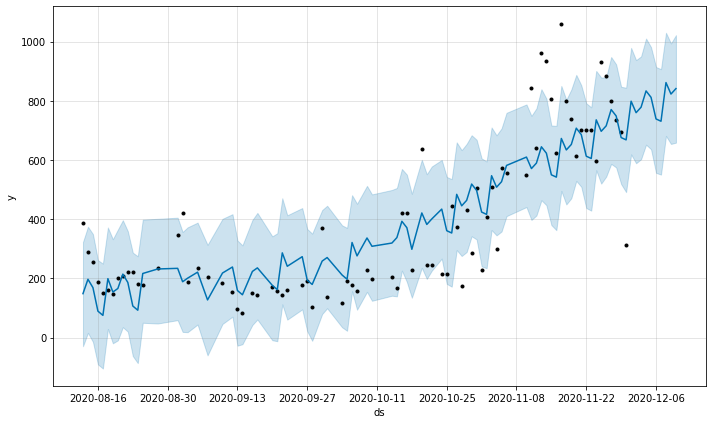

In [27]:
fig1 = m.plot(prophet_pred)

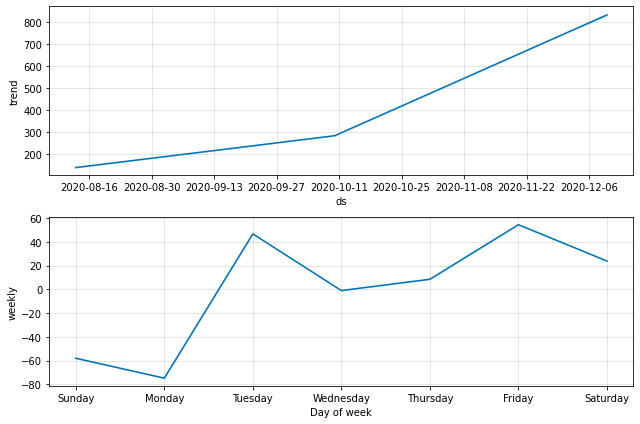

In [28]:
fig2 = m.plot_components(prophet_pred)

In [29]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-10:]['ds'], "Pred" : prophet_pred[-10:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred

,Pred
Date,
2020-12-01,798.860200
2020-12-02,760.063989
2020-12-03,778.570107
2020-12-04,833.594966
2020-12-05,811.965852
2020-12-06,738.942483
2020-12-07,731.135316
2020-12-08,861.818853
2020-12-09,823.022642


<ipython-input-30-b9d8127c6aa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Prophet_Predictions"] = prophet_pred['Pred'].values


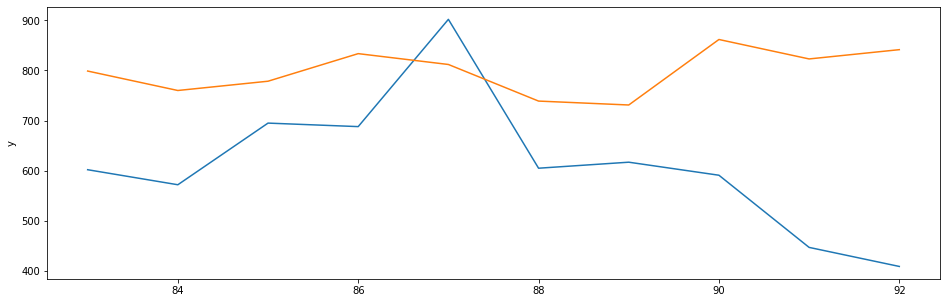

In [30]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["y"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

#### The blue line represents dialy new Covid cases in St. Louis County and the orange line represents Prophet Predictions.

In [31]:
mae_error = mean_absolute_error(test_data['y'], test_data["Prophet_Predictions"])
mse_error = mean_squared_error(test_data['y'], test_data["Prophet_Predictions"])
rmse_error = np.sqrt(mse_error)
mean_value = df['County'].mean()

print(f'MAE Error: {mae_error} \nMSE Error: {mse_error}\nRMSE Error: {rmse_error}\nMean: {mean_value}')

MAE Error: 203.15714629710223 
MSE Error: 54319.44720665187
RMSE Error: 233.0653281950189
Mean: 402.8279569892473
